## UPST Stock Analysis
<img src="static/logo.png" alt="error" width="500" height="100">

### Abstract
information
information

### Process
sub heading

### Setup
see README file for environment setup

In [1]:
from src.scraper2 import scrape
from src.functions import reviewCount
import pandas as pd
import datetime

url = "https://www.creditkarma.com/reviews/personal-loan/single/id/upstart-personal-loans?pg={}"
startPage = 1
endPage = 1
csvName = "test.csv"
# Format scrape(url:str,startPage:int,endPage:int,csvName:str)
#scrape(url,startPage,endPage,csvName)
"""
reviews = reviewCount(url)
pageCount = int(reviews/10)
if(reviews%10 != 0):
    pageCount += 1
print("There are ",reviews," reviews and ",pageCount, "pages")
"""
#startPage = int(input("What page would you like to start reading at: "))
#endPage = int(input("To what page would you like to read to: "))

'\nreviews = reviewCount(url)\npageCount = int(reviews/10)\nif(reviews%10 != 0):\n    pageCount += 1\nprint("There are ",reviews," reviews and ",pageCount, "pages")\n'

In [2]:
#df = scrape(url,startPage,endPage,csvName)
#df.head()

df = pd.read_csv('data/first100.csv')
df1 = pd.read_csv('data/second100.csv')
df = pd.concat([df, df1],ignore_index=True)
df2 = pd.read_csv('data/second200.csv')
df = pd.concat([df, df2],ignore_index=True)
df3 = pd.read_csv('data/next1000.csv')
df = pd.concat([df, df3],ignore_index=True)

#df.to_csv("data/first100.csv", index=False)

print(df.shape)
print(df)


(14000, 2)
       rating out of 5          date
0                    5  Apr 05, 2023
1                    5  Apr 04, 2023
2                    5  Apr 03, 2023
3                    5  Apr 02, 2023
4                    3  Mar 31, 2023
...                ...           ...
13995                5  Feb 19, 2016
13996                5  Feb 18, 2016
13997                5  Feb 15, 2016
13998                5  Feb 15, 2016
13999                5  Feb 12, 2016

[14000 rows x 2 columns]


In [3]:
df['newDate'] = df['date'].apply(lambda x: (datetime.datetime.strptime(x, '%b %d, %Y').strftime('%Y-%m-%d')))
#df['date'] = df['newDate']
#df.drop(['date'],axis=1)
df['quarter'] = df['newDate'].apply(lambda x: (datetime.datetime.strptime(x, '%Y-%m-%d').month - 1) // 3 + 1)

hot_values = pd.get_dummies(df['quarter'])
temp_df = df
temp_df = temp_df.join(hot_values)
print(temp_df.shape)
print(temp_df)





(14000, 8)
       rating out of 5          date     newDate  quarter  1  2  3  4
0                    5  Apr 05, 2023  2023-04-05        2  0  1  0  0
1                    5  Apr 04, 2023  2023-04-04        2  0  1  0  0
2                    5  Apr 03, 2023  2023-04-03        2  0  1  0  0
3                    5  Apr 02, 2023  2023-04-02        2  0  1  0  0
4                    3  Mar 31, 2023  2023-03-31        1  1  0  0  0
...                ...           ...         ...      ... .. .. .. ..
13995                5  Feb 19, 2016  2016-02-19        1  1  0  0  0
13996                5  Feb 18, 2016  2016-02-18        1  1  0  0  0
13997                5  Feb 15, 2016  2016-02-15        1  1  0  0  0
13998                5  Feb 15, 2016  2016-02-15        1  1  0  0  0
13999                5  Feb 12, 2016  2016-02-12        1  1  0  0  0

[14000 rows x 8 columns]


In [4]:
df = temp_df.drop(['date','quarter'],axis=1)
df = df.rename(columns={'newDate': 'date'})


interest_rates = pd.read_csv('data/interestRates.csv')  # read in your dataframe from a CSV file, replace with your actual data source


# convert date columns to datetime format
df['date'] = pd.to_datetime(df['date'])
interest_rates['DATE'] = pd.to_datetime(interest_rates['DATE'])

# extract year and month from date columns
df['year_month'] = df['date'].dt.to_period('M')
interest_rates['year_month'] = interest_rates['DATE'].dt.to_period('M')

# merge DataFrames on year_month column
merged = df.merge(interest_rates, on='year_month', suffixes=('', '_interest'))

# create new column based on interest value
#merged['interest'] = merged['value_interest']

# drop unnecessary columns
merged = merged.drop(['DATE'], axis=1)
df = merged
print(df)

       rating out of 5       date  1  2  3  4 year_month  FEDFUNDS
0                    3 2023-03-31  1  0  0  0    2023-03      4.65
1                    5 2023-03-31  1  0  0  0    2023-03      4.65
2                    5 2023-03-31  1  0  0  0    2023-03      4.65
3                    5 2023-03-30  1  0  0  0    2023-03      4.65
4                    5 2023-03-28  1  0  0  0    2023-03      4.65
...                ...        ... .. .. .. ..        ...       ...
13991                5 2016-02-19  1  0  0  0    2016-02      0.38
13992                5 2016-02-18  1  0  0  0    2016-02      0.38
13993                5 2016-02-15  1  0  0  0    2016-02      0.38
13994                5 2016-02-15  1  0  0  0    2016-02      0.38
13995                5 2016-02-12  1  0  0  0    2016-02      0.38

[13996 rows x 8 columns]


DatetimeIndex(['2016-02-01', '2016-03-01', '2016-04-01', '2016-05-01',
               '2016-06-01', '2016-07-01', '2016-08-01', '2016-09-01',
               '2016-10-01', '2016-11-01', '2016-12-01', '2017-01-01',
               '2017-02-01', '2017-03-01', '2017-04-01', '2017-05-01',
               '2017-06-01', '2017-07-01', '2017-08-01', '2017-09-01',
               '2017-10-01', '2017-11-01', '2017-12-01', '2018-01-01',
               '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01',
               '2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01',
               '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01',
               '2020-06-01', '2020-07-01', '2020-08-01', '2020-09-01',
      

ConversionError: Failed to convert value(s) to axis units: '2016-01'

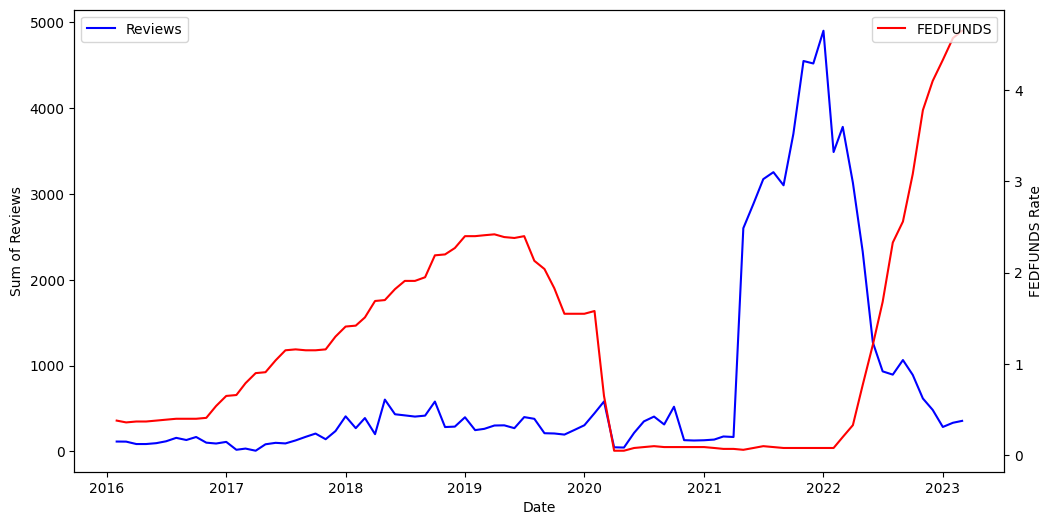

In [40]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# plot sum of reviews per month
dates = df['date'].astype(str).apply(lambda x: x[:-3]) # get year-month format
reviews_per_month = df.groupby(dates)['rating out of 5'].sum()
fig, ax1 = plt.subplots(figsize=(12, 6))
# Convert the index to datetime objects
date_index = pd.to_datetime(reviews_per_month.index, format='%Y-%m')

# Plot your data
ax1.plot(date_index, reviews_per_month.values, color='blue', label='Reviews')
print(date_index)

print(df.columns)
# set the background color of the plot to dark grey where mask is True
#mask = df.groupby(dates)[1] == 1

        #ax1[date_index].patch.set_facecolor('xkcd:dark grey')
#print(mask)
# Set the x-axis label
ax1.set_xlabel('Date')

# add y axis label and legend for ax1
ax1.set_ylabel('Sum of Reviews')
ax1.legend(loc='upper left')

# add second y axis for FEDFUNDS rate
ax2 = ax1.twinx()
ax2.plot(date_index, df.groupby(dates)['FEDFUNDS'].mean().sort_index(), color='red', label='FEDFUNDS')

# add y axis label and legend for ax2
ax2.set_ylabel('FEDFUNDS Rate')
ax2.legend(loc='upper right')

# plot vertical dashed lines at January, April, July, and October

years = sorted(set([date[:4] for date in reviews_per_month.index]))
print(years)
"""
for year in years:
    ax1.axvline(x='{}-01'.format(year), color='gray', linestyle='--')
    ax1.axvline(x='{}-04'.format(year), color='gray', linestyle='--')
    ax1.axvline(x='{}-07'.format(year), color='gray', linestyle='--')
    ax1.axvline(x='{}-10'.format(year), color='gray', linestyle='--')
"""
#print(reviews_per_month.index)


plt.show()